In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install contractions


In [3]:
import re
import nltk
import string
import nlp_utils
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [9]:
df['severe_toxic'].value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [10]:
 df['obscene'].value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

In [11]:
 df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [12]:
 df['insult'].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [13]:
 df['identity_hate'].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

#Data Visualization

In [14]:
sentencetype_graph=df.iloc[:,2:].sum()

In [15]:
sentencetype_graph

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

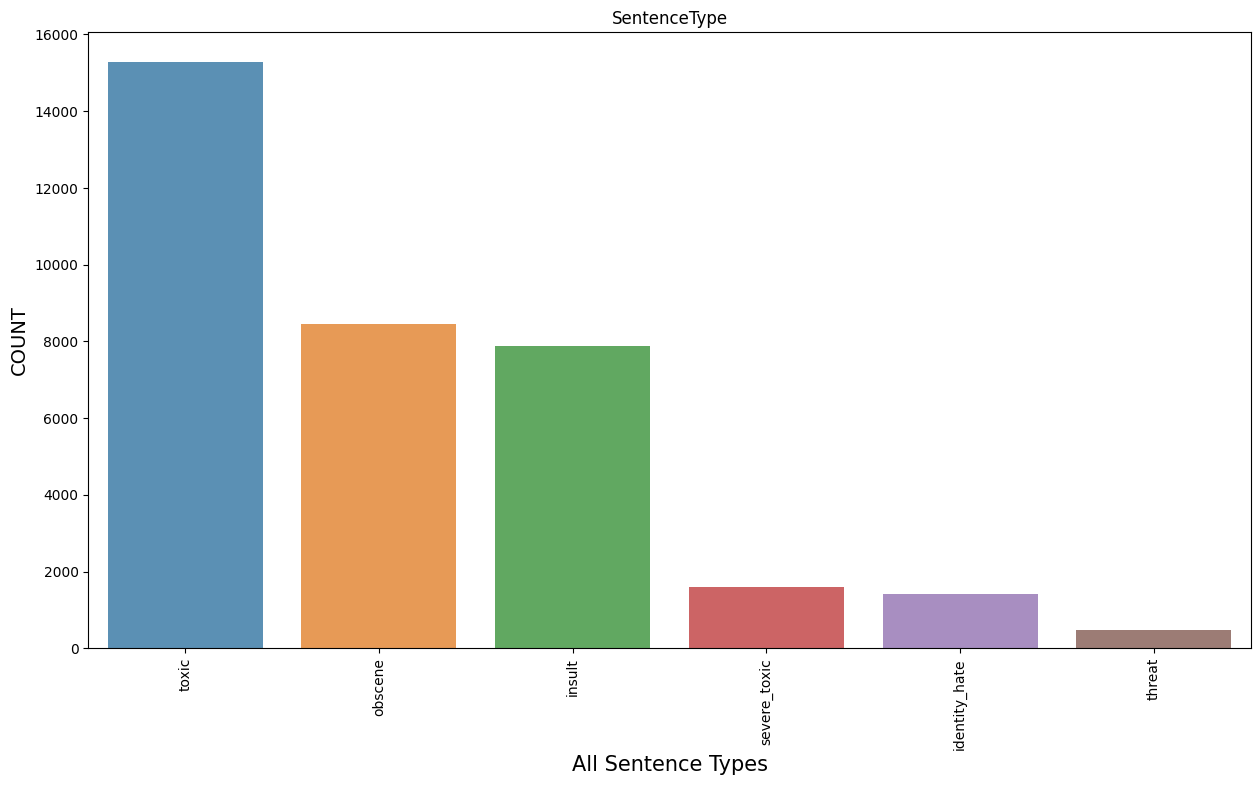

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

ls = sentencetype_graph.sort_values(ascending=False)
plt.figure(figsize=(15, 8))
temp = sns.barplot(x=ls.index, y=ls.values, alpha=0.8)
plt.title('SentenceType')
plt.xlabel("All Sentence Types",fontsize=15)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()


In [17]:
df['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [18]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower=lambda x:re.sub('[%s]'% re.escape(string.punctuation),' ',x.lower())
remove_n=lambda x: re.sub("\n"," ",x)
remove_non_ascii=lambda x:re.sub(r'[^\x00-\x7f]',r' ',x)
df['comment_text']=df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [19]:
insulting_comment_df=df.loc[:,['id','comment_text','insult']]

In [20]:
identity_hate_df=df.loc[:,['id','comment_text','identity_hate']]

In [21]:
obscene_comment_df=df.loc[:,['id','comment_text','obscene']]

In [22]:
threatening_comment_df=df.loc[:,['id','comment_text','threat']]

In [23]:
severetoxic_comment_df=df.loc[:,['id','comment_text','severe_toxic']]

In [24]:
toxic_comment_df=df.loc[:,['id','comment_text','toxic']]

In [25]:
severetoxic_comment_df

,id,comment_text,severe_toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [26]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords

In [27]:
import matplotlib.pyplot as plt

def wordcloud(df, label):
    subset = df[df[label] == 1]
    text = subset.comment_text.values
    wc = WordCloud(background_color="black", max_words=2000)
    wc.generate(" ".join(text))

    plt.figure(figsize=(20, 20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)




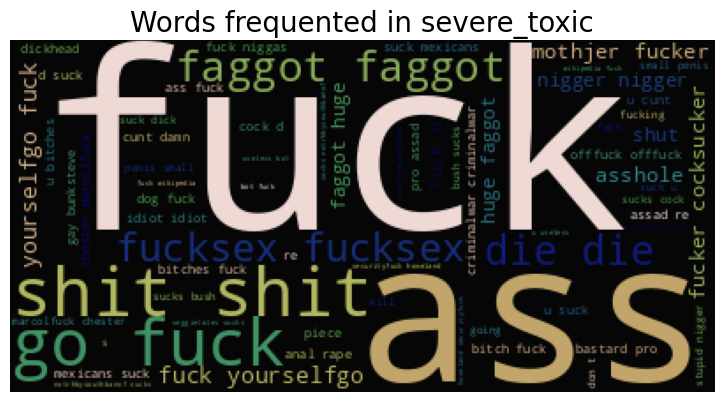

In [28]:
wordcloud(severetoxic_comment_df, 'severe_toxic')

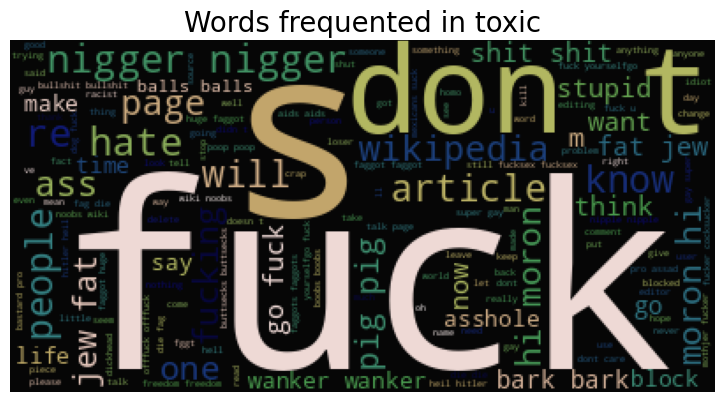

In [29]:
wordcloud(toxic_comment_df, 'toxic')

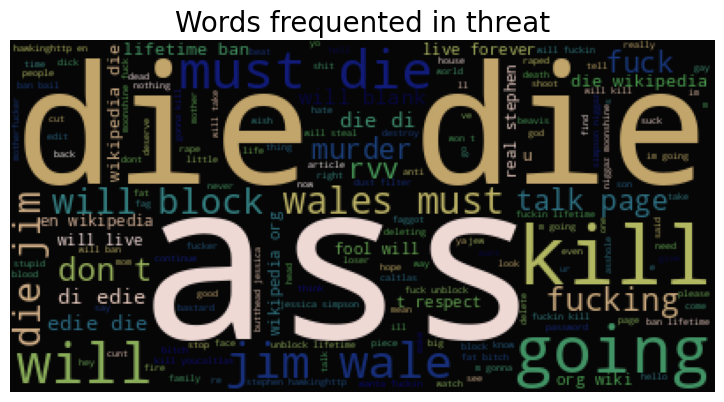

In [30]:
wordcloud(threatening_comment_df, 'threat')

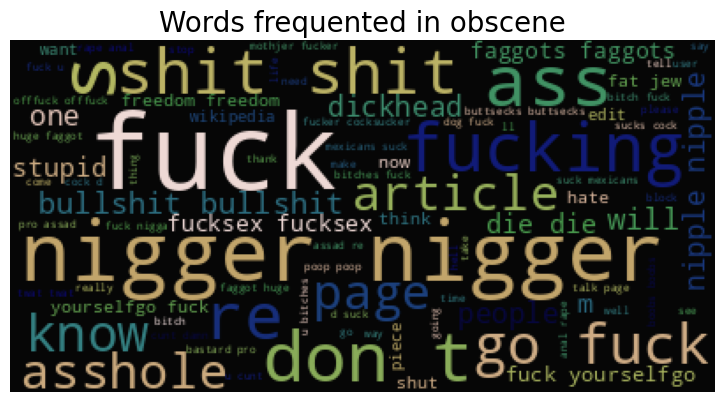

In [31]:
wordcloud(obscene_comment_df, 'obscene')

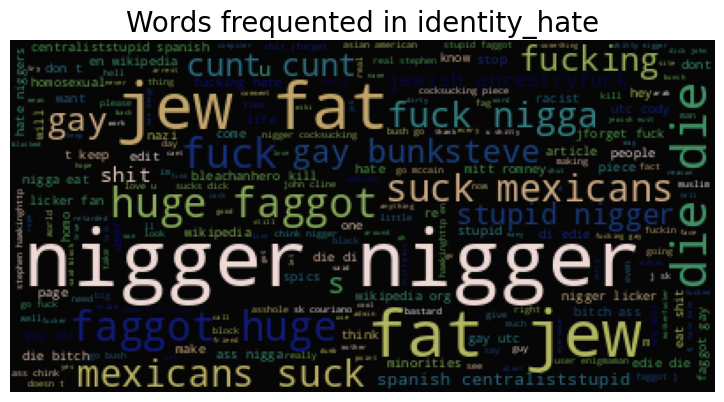

In [32]:
wordcloud(identity_hate_df, 'identity_hate')

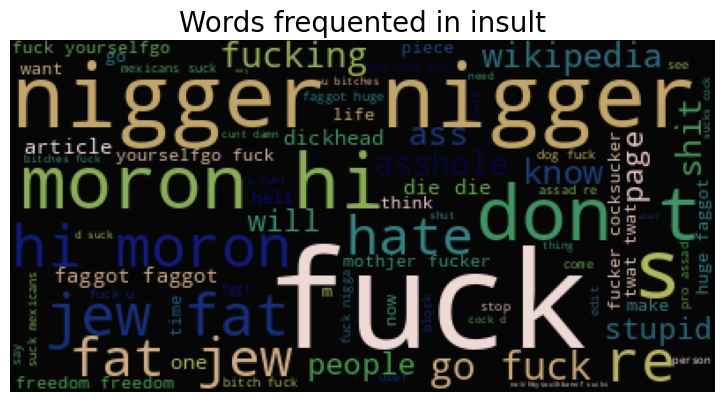

In [33]:
wordcloud(insulting_comment_df, 'insult')

#balancing number of 0s and 1s (output label)

In [53]:
toxic_comment_balanced_1 = toxic_comment_df[toxic_comment_df['toxic'] == 1].iloc[0:5000,:]
# Selecting only 5000 toxic comments
toxic_comment_balanced_0 = toxic_comment_df[toxic_comment_df['toxic'] == 0].iloc[0:5000,:]
# Selecting only 5000 non toxic comments
toxic_comment_balanced_1.shape
# Shape of Toxic_comment_balanced_1
toxic_comment_balanced_0.shape
# Shape of Toxic_comment_balanced_0
toxic_comment_balanced_1['toxic'].value_counts()
# Value_counts of Toxic_comment_balanced_1
toxic_comment_balanced_0['toxic'].value_counts()
# Value_counts of Toxic_comment_balanced_0
toxic_comment_balanced=pd.concat([toxic_comment_balanced_1,toxic_comment_balanced_0])
## concatenating toxic and non toxic comments
toxic_comment_balanced['toxic'].value_counts()
# Balanced column

1    5000
0    5000
Name: toxic, dtype: int64

In [44]:
severetoxic_comment_df['severe_toxic'].value_counts()
# value counts of Severetoxic_comment_df
severetoxic_comment_df_1 = severetoxic_comment_df[severetoxic_comment_df['severe_toxic'] == 1].iloc[0:1595,:]
# selecting 1595 values of Severetoxic_comment_df_1
severetoxic_comment_df_0 = severetoxic_comment_df[severetoxic_comment_df['severe_toxic'] == 0].iloc[0:1595,:]
# selecting 1595 values of Severetoxic_comment_df_0
severe_toxic_comment_balanced=pd.concat([severetoxic_comment_df_1,severetoxic_comment_df_0])
# Concatenating Severetoxic_comment_df_1 and Severetoxic_comment_df_0
severe_toxic_comment_balanced['severe_toxic'].value_counts()
# Final value counts of the Severetoxic_comment_balanced

1    1595
0    1595
Name: severe_toxic, dtype: int64

In [47]:
obscene_comment_df['obscene'].value_counts()

obscene_comment_df_1 = obscene_comment_df[obscene_comment_df['obscene'] == 1].iloc[0:5000,:]

obscene_comment_df_0 = obscene_comment_df[obscene_comment_df['obscene'] == 0].iloc[0:5000,:]

obscene_comment_df_balanced=pd.concat([obscene_comment_df_1,obscene_comment_df_0])

obscene_comment_df_balanced['obscene'].value_counts()


1    5000
0    5000
Name: obscene, dtype: int64

In [49]:
threatening_comment_df_1 = threatening_comment_df[threatening_comment_df['threat'] == 1].iloc[0:478,:]

threatening_comment_df_0 = threatening_comment_df[threatening_comment_df['threat'] == 0].iloc[0:478,:]

threatening_comment_df_balanced=pd.concat([threatening_comment_df_1,threatening_comment_df_0])

threatening_comment_df_balanced['threat'].value_counts()

1    478
0    478
Name: threat, dtype: int64

In [50]:
insulting_comment_df_1 = insulting_comment_df[insulting_comment_df['insult'] == 1].iloc[0:5000,:]

insulting_comment_df_0 = insulting_comment_df[insulting_comment_df['insult'] == 0].iloc[0:5000,:]

insulting_comment_df_balanced=pd.concat([insulting_comment_df_1,insulting_comment_df_0])

insulting_comment_df_balanced['insult'].value_counts()

1    5000
0    5000
Name: insult, dtype: int64

In [52]:
identity_hate_df_1 = identity_hate_df[identity_hate_df['identity_hate'] == 1].iloc[0:1405,:]

identity_hate_df_0 = identity_hate_df[identity_hate_df['identity_hate'] == 0].iloc[0:1405,:]

identity_hate_df_balanced=pd.concat([identity_hate_df_1,identity_hate_df_0])

identity_hate_df_balanced['identity_hate'].value_counts()

1    1405
0    1405
Name: identity_hate, dtype: int64

#BUILDING THE ML MODEL

In [55]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams,bigrams,trigrams

In [58]:
def cv_tf_train_test(dataframe,label,vectorizer,ngram):
  x=dataframe.comment_text
  y=dataframe[label]
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
  #removing stopwords
  cv1=vectorizer(ngram_range=(ngram),stop_words='english')
  #transforming x-train and x-test
  x_train_cv1=cv1.fit_transform(x_train)
  x_test_cv1=cv1.transform(x_test)
    #ML MODELS
    ## Logistic regression
  lr = LogisticRegression()
  lr.fit(x_train_cv1, y_train)

    ## k-nearest neighbours
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(x_train_cv1, y_train)

    ## Naive Bayes
  bnb = BernoulliNB()
  bnb.fit(x_train_cv1, y_train)

    ## Multinomial naive bayes
  mnb = MultinomialNB()
  mnb.fit(x_train_cv1, y_train)

    ## Support vector machine
  svm_model = LinearSVC()
  svm_model.fit(x_train_cv1, y_train)

    ## Random Forest
  randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
  randomforest.fit(x_train_cv1, y_train)
  f1_score_data = {'F1 Score':[f1_score(lr.predict(x_test_cv1), y_test), f1_score(knn.predict(x_test_cv1), y_test),
                                f1_score(bnb.predict(x_test_cv1), y_test), f1_score(mnb.predict(x_test_cv1), y_test),
                                f1_score(svm_model.predict(x_test_cv1), y_test), f1_score(randomforest.predict(x_test_cv1), y_test)]}
    ## Saving f1 score results into a dataframe
  df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])

  return df_f1


#evaluation of model performance

In [59]:
severe_toxic_comment_cv = cv_tf_train_test(severe_toxic_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,1))
severe_toxic_comment_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)
severe_toxic_comment_cv

,F1 Score(severe_toxic)
Log Regression,0.940282
KNN,0.862620
BernoulliNB,0.790738
MultinomialNB,0.932377
SVM,0.937901
Random Forest,0.941176


In [61]:
obscene_comment_cv = cv_tf_train_test(obscene_comment_df_balanced, 'obscene', TfidfVectorizer, (1,1))
obscene_comment_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
obscene_comment_cv
# Random Forest has higher F1 score

,F1 Score(obscene)
Log Regression,0.901183
KNN,0.677880
BernoulliNB,0.766640
MultinomialNB,0.887496
SVM,0.915613
Random Forest,0.884261


In [62]:
threat_comment_cv = cv_tf_train_test(threatening_comment_df_balanced, 'threat', TfidfVectorizer, (1,1))
threat_comment_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
threat_comment_cv
# Random Forest has higher F1 score

,F1 Score(threat)
Log Regression,0.897338
KNN,0.852459
BernoulliNB,0.745205
MultinomialNB,0.902098
SVM,0.894737
Random Forest,0.923077


In [63]:
insult_comment_cv = cv_tf_train_test(insulting_comment_df_balanced, 'insult', TfidfVectorizer, (1,1))
insult_comment_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
insult_comment_cv
# SVM has higher F1 score

,F1 Score(insult)
Log Regression,0.901851
KNN,0.379693
BernoulliNB,0.776986
MultinomialNB,0.896299
SVM,0.906218
Random Forest,0.890821


In [65]:
identity_hatecomment_cv = cv_tf_train_test(identity_hate_df_balanced, 'identity_hate', TfidfVectorizer, (1,1))
identity_hatecomment_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)
identity_hatecomment_cv
# MultinomialNB has higher F1 score

,F1 Score(identity_hate)
Log Regression,0.905707
KNN,0.820046
BernoulliNB,0.776699
MultinomialNB,0.903302
SVM,0.896806
Random Forest,0.888087


In [66]:
X = toxic_comment_balanced.comment_text
y = toxic_comment_balanced['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1])

In [67]:
comment1 = ['i killed an insect and ate it']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.73519444])

In [68]:
comment2 = ['Is this sentence a good one']
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.08770635])

In [71]:
comment2 = ['truth shall prevail']
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]
## The above comment is 46 percent toxic.

array([0.46213997])

In [72]:
X = severe_toxic_comment_balanced.comment_text
y = severe_toxic_comment_balanced['severe_toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [74]:
comment1 = ['she is a bitch']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.9725])

In [75]:
X = obscene_comment_df_balanced.comment_text
y = obscene_comment_df_balanced['obscene']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 0, 1])

In [88]:
comment1 = ['you are a slut']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.17])

In [77]:
X = threatening_comment_df_balanced.comment_text
y =threatening_comment_df_balanced['threat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1])

In [78]:
comment1 = ['I will kill you']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.95])

In [89]:
X = insulting_comment_df_balanced.comment_text
y =insulting_comment_df_balanced['insult']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 0, ..., 1, 0, 1])

In [92]:
comment1 = ['You are  fat']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.94658766])

In [94]:
X = identity_hate_df_balanced.comment_text
y = identity_hate_df_balanced['identity_hate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [95]:
comment1 = ['You are a nigger']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.99])